In [2]:
import math

# The gravitational constant G
G = 6.67428e-11

class Celestial_Object:
    
    def __init__(self, mass, px, py, vx, vy):
    
        # vx, vy: x, y velocities in m/s
        # px, py: x, y positions in m
        # mass in kg
    
        self.mass = mass
        self.vx = vx
        self.vy = vy
        self.px = px
        self.py = py
    
    def attraction(self, other):

        # Returns the force exerted upon this body by the other object.

        # We don't compute the force of gravity from ourself
        # Report an error if the other object is the same as this one.
        assert self is not other
        
        # Compute the distance to the other object.
        dx = (other.px-self.px) # distance in the x-direction
        dy = (other.py-self.py) # distance in the y-direction
        d = math.sqrt(dx**2 + dy**2) # magnitude of the distance vector

        # Report an error if the distance is zero
        assert d > 0

        # Compute the force of attraction
        f = G * self.mass * other.mass / (d**2)

        # Compute the direction of the force.
        theta = math.atan2(dy, dx)
        fx = math.cos(theta) * f
        fy = math.sin(theta) * f
        return fx, fy

def loop(bodies):
    
    # loops through the simulation, updating the
    # positions and velocities of all the provided bodies.
    
    timestep = 24.0*60.0*60.0  # One day in seconds

    force = {}
    for body in bodies:
        
        # Add up all of the forces exerted on this 'body'.
        total_fx = 0.0 # total force in the x-direction
        total_fy = 0.0 # total force in the y-direction
        for other in bodies:
            # Don't calculate the body's attraction to itself
            # continue skips the remaining steps and goes back to the start of the loop
            if body is other:
                continue 
            fx, fy = body.attraction(other)
            total_fx += fx # update the total x force with the value from this body
            total_fy += fy # update the total y force with the value from this body

        # Record the total force exerted.
        # force is a dictionary with a multi-valued key
        force[body] = (total_fx, total_fy)

    # Update velocities based upon on the force.
    for body in bodies:
        fx, fy = force[body]
        body.vx += fx / body.mass * timestep
        body.vy += fy / body.mass * timestep

        # Update positions
        body.px += body.vx * timestep
        body.py += body.vy * timestep

#### Use the class to create objects

In [3]:
sun = Celestial_Object(1.9891e30, 0, 0, 0, 0)
mercury = Celestial_Object(3.3022e23, -4.6e10, 0, 0, -58980)
venus = Celestial_Object(4.8685e24, -1.07e11, 0, 0, -35260)
earth = Celestial_Object(5.9736e24, -1.47e11, 0, 0, -30300)
mars = Celestial_Object(6.4185e23, -2.07e11, 0, 0, -26500)
jupiter = Celestial_Object(1.8986e27, -7.41e11, 0, 0, -13720)
saturn = Celestial_Object(5.6846e26, -1.35e12, 0, 0, -10180)
uranus = Celestial_Object(8.6810e25, -2.74e12, 0, 0, -7110)
neptune = Celestial_Object(10.243e25, -4.44e12, 0, 0, -5500)

#### Visualize the initial positions

In [4]:
import matplotlib.pyplot as plt
import matplotlib.text as txt
%matplotlib inline

Text(0,0.5,'y-position (meters)')

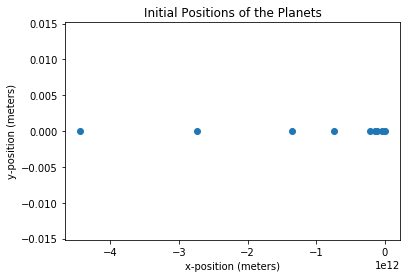

In [5]:
x = [sun.px, mercury.px, venus.px, earth.px, mars.px, jupiter.px, saturn.px, uranus.px, neptune.px]
y = [sun.py, mercury.py, venus.py, earth.py, mars.py, jupiter.py, saturn.py, uranus.py, neptune.py]
plt.scatter(x,y)
plt.title('Initial Positions of the Planets')
plt.xlabel('x-position (meters)')
plt.ylabel('y-position (meters)')

Text(0,0.5,'y-position (meters)')

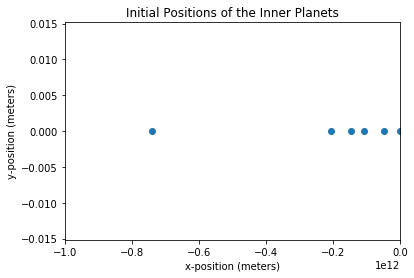

In [6]:
plt.scatter(x,y)
plt.xlim(-1e12,0)
plt.title('Initial Positions of the Inner Planets')
plt.xlabel('x-position (meters)')
plt.ylabel('y-position (meters)')

#### Put all of the planets and sun into a list and run the simulation

In [7]:
bodies = [sun,mercury,venus,earth,mars,jupiter,saturn,uranus,neptune]
for i in range(365):
    loop(bodies)

#### Visualize the results

-624120635627.1855 -409795010626.36383
-4436634948661.502


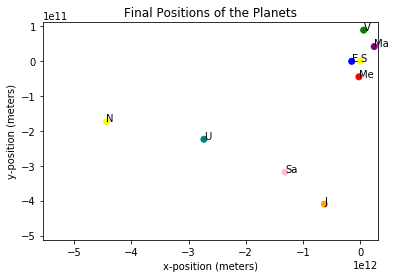

In [8]:
colors = ['yellow','red','green','blue','purple','orange','pink','teal']
marker = ['S','Me','V','E','Ma','J','Sa','U','N']
x = [sun.px, mercury.px, venus.px, earth.px, mars.px, jupiter.px, saturn.px, uranus.px, neptune.px]
y = [sun.py, mercury.py, venus.py, earth.py, mars.py, jupiter.py, saturn.py, uranus.py, neptune.py]
plt.scatter(x, y, c=colors)
plt.title('Final Positions of the Planets')
plt.xlabel('x-position (meters)')
plt.ylabel('y-position (meters)')
plt.xlim(1.25*min(x),1.25*max(x))
plt.ylim(1.25*min(y),1.25*max(y))
for i in range(len(x)):
    plt.text(x[i],y[i],marker[i])
print(jupiter.px,jupiter.py)
print(min(x))

In [19]:
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
for i in range(365):
    loop(bodies)
    x1.append(sun.px)
    x2.append(mercury.px)
    x3.append(venus.px)
    x4.append(earth.px)
    x5.append(mars.px)
    y1.append(sun.py)
    y2.append(mercury.py)
    y3.append(venus.py)
    y4.append(earth.py)
    y5.append(mars.py)
    ## Or, as two lists and a scatter plot
    #x.extend([sun.px,mercury.px,venus.px,earth.px,mars.px])
    #y.extend([sun.py,mercury.py,venus.py,earth.py,mars.py])

Text(0,0.5,'y-position (meters)')

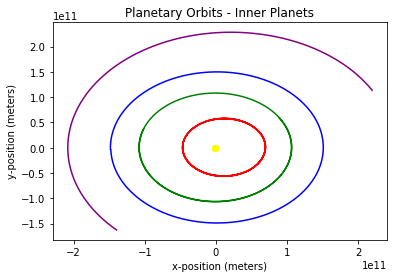

In [22]:
plt.scatter(x1, y1, c='yellow')
plt.plot(x2, y2, c='red')
plt.plot(x3, y3, c='green')
plt.plot(x4, y4, c='blue')
plt.plot(x5, y5, c='purple')
plt.title('Planetary Orbits - Inner Planets')
plt.xlabel('x-position (meters)')
plt.ylabel('y-position (meters)')


(-2000000000.0, 2000000000.0)

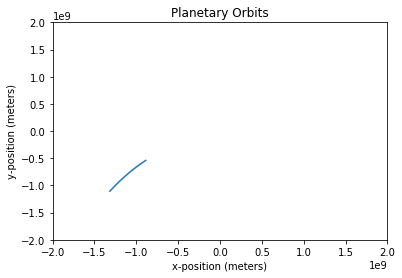

In [27]:
plt.plot(x1, y1)
plt.title('Planetary Orbits')
plt.xlabel('x-position (meters)')
plt.ylabel('y-position (meters)')
plt.xlim(-2e9,2e9)
plt.ylim(-2e9,2e9)